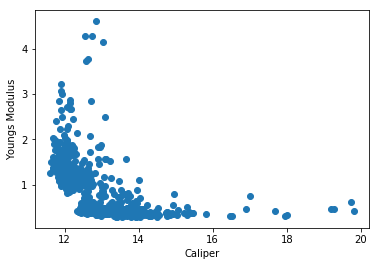

(-0.56441766467476462, 1.9609347920077942e-78)


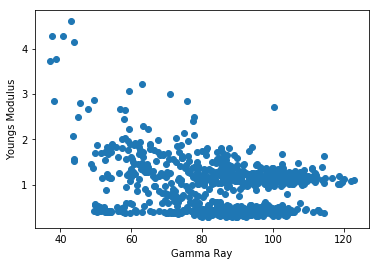

(-0.31282653078346412, 2.5946893157989732e-22)


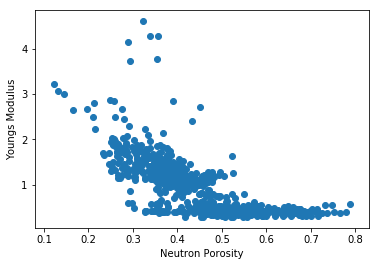

(-0.72681493401351693, 8.9434105966891861e-152)


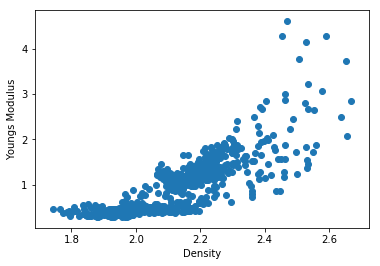

(0.84079235436514954, 1.2615705225689713e-246)


In [18]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Read the CSV file into a DataFrame: df
df_1 = pd.read_csv('/Users/jodelcornelio/Desktop/WELL1.CSV')
df_2 = pd.read_csv('/Users/jodelcornelio/Desktop/WELL2.CSV')
df_3 = pd.read_csv('/Users/jodelcornelio/Desktop/WELL3.CSV')

plt.scatter(df_1['XCAL'],df_1['E'])
plt.xlabel('Caliper')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(df_1['XCAL'],df_1['E']))

plt.scatter(df_1['XGR'],df_1['E'])
plt.xlabel('Gamma Ray')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(df_1['XGR'],df_1['E']))

plt.scatter(df_1['XNPHIS'],df_1['E'])
plt.xlabel('Neutron Porosity')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(df_1['XNPHIS'],df_1['E']))

plt.scatter(df_1['XRHOB'],df_1['E'])
plt.xlabel('Density')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(df_1['XRHOB'],df_1['E']))

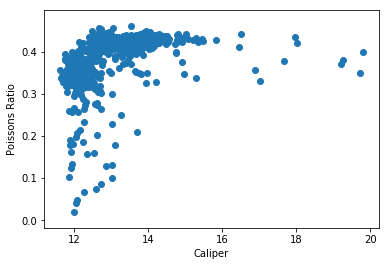

(0.4367038512620211, 4.4072587333466378e-44)


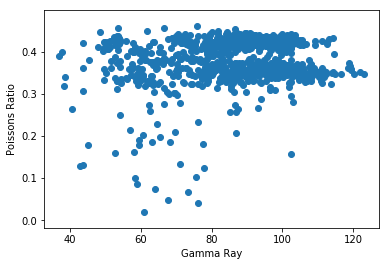

(0.17039500508583902, 2.0302756913405195e-07)


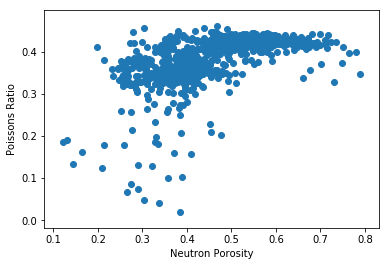

(0.5643806529261528, 2.0169698482421187e-78)


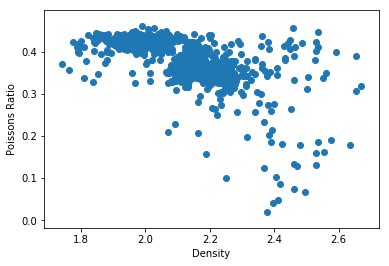

(-0.64107822123142399, 1.6490757554587868e-107)


In [19]:
plt.scatter(df_1['XCAL'],df_1['v'])
plt.xlabel('Caliper')
plt.ylabel('Poissons Ratio')
plt.show()
print(scipy.stats.pearsonr(df_1['XCAL'],df_1['v']))

plt.scatter(df_1['XGR'],df_1['v'])
plt.xlabel('Gamma Ray')
plt.ylabel('Poissons Ratio')
plt.show()
print(scipy.stats.pearsonr(df_1['XGR'],df_1['v']))

plt.scatter(df_1['XNPHIS'],df_1['v'])
plt.xlabel('Neutron Porosity')
plt.ylabel('Poissons Ratio')
plt.show()
print(scipy.stats.pearsonr(df_1['XNPHIS'],df_1['v']))


plt.scatter(df_1['XRHOB'],df_1['v'])
plt.xlabel('Density')
plt.ylabel('Poissons Ratio')
plt.show()
print(scipy.stats.pearsonr(df_1['XRHOB'],df_1['v']))

In [20]:
df_1['v_round'] = round(df_1['v'],2)
df_1['XNPHIS_round'] = round(df_1['XNPHIS'],1)
df_1['E_round'] = round(df_1['E'],1)
df_1['XGR_round'] = round(df_1['XGR'],0)
df_1['XCAL_round'] = round(df_1['XCAL'],0)
df_1['XRHOB_round'] = round(df_1['XRHOB'],1)
df_1.head()
df_2['v_round'] = round(df_2['v'],2)
df_2['XNPHIS_round'] = round(df_2['XNPHIS'],1)
df_2['E_round'] = round(df_2['E'],1)
df_2['XGR_round'] = round(df_2['XGR'],0)
df_2['XCAL_round'] = round(df_2['XCAL'],0)
df_2['XRHOB_round'] = round(df_2['XRHOB'],1)
df_2.head()
df_3['v_round'] = round(df_3['v'],2)
df_3['XNPHIS_round'] = round(df_3['XNPHIS'],1)
df_3['E_round'] = round(df_3['E'],1)
df_3['XGR_round'] = round(df_3['XGR'],0)
df_3['XCAL_round'] = round(df_3['XCAL'],0)
df_3['XRHOB_round'] = round(df_3['XRHOB'],1)
df_3.head()

,DEPTH,TVD,TVDSS,RHOZ,XCAL,XDRHO,XDT,XDTS,XGR,XNPHIL,...,XSP,R,v,E,v_round,XNPHIS_round,E_round,XGR_round,XCAL_round,XRHOB_round
0,1733.0,1688.0443,-1604.0443,2.1003,12.7986,-0.0055,150.3450,425.6243,62.6711,0.3395,...,-11.1317,2.830984,0.428719,0.443925,0.43,0.4,0.4,63.0,13.0,2.1
1,1733.5,1688.5172,-1604.5172,2.1457,12.5321,-0.0009,146.7690,430.7975,62.8598,0.3458,...,-11.7731,2.935208,0.434344,0.444438,0.43,0.4,0.4,63.0,13.0,2.1
2,1734.0,1688.9901,-1604.9901,2.1673,12.3961,-0.0014,142.5642,448.1322,64.5449,0.3123,...,-11.5707,3.143371,0.443699,0.417559,0.44,0.4,0.4,65.0,12.0,2.2
3,1734.5,1689.4630,-1605.4630,2.1753,12.4299,-0.0019,141.0633,454.8871,66.1933,0.2671,...,-11.5158,3.224702,0.446801,0.407620,0.45,0.3,0.4,66.0,12.0,2.2
4,1735.0,1689.9359,-1605.9359,2.1503,12.6687,-0.0022,144.2063,455.1989,68.2902,0.2634,...,-11.1788,3.156581,0.444221,0.401666,0.44,0.3,0.4,68.0,13.0,2.2


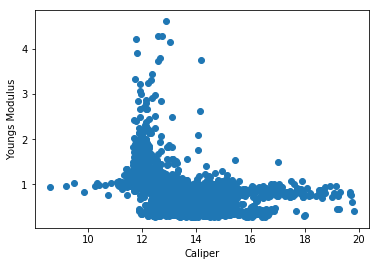

(-0.42457543793388458, 5.443378726222327e-146)


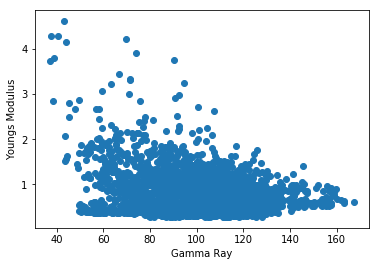

(-0.29011403349082404, 1.20876682421443e-65)


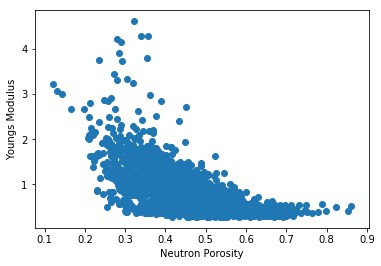

(-0.65406697529496305, 0.0)


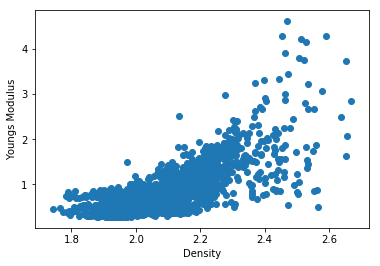

(0.78498271375872397, 0.0)


In [21]:
frame = [df_1,df_2]
frames = pd.concat(frame)

plt.scatter(frames['XCAL'],frames['E'])
plt.xlabel('Caliper')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XCAL'],frames['E']))

plt.scatter(frames['XGR'],frames['E'])
plt.xlabel('Gamma Ray')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XGR'],frames['E']))

plt.scatter(frames['XNPHIS'],frames['E'])
plt.xlabel('Neutron Porosity')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XNPHIS'],frames['E']))

plt.scatter(frames['XRHOB'],frames['E'])
plt.xlabel('Density')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XRHOB'],frames['E']))

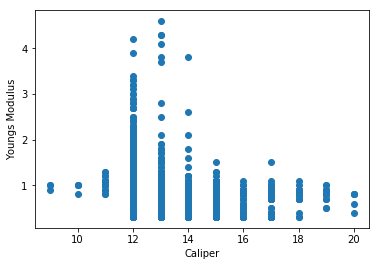

(-0.42072405730861639, 4.0436155344129977e-143)


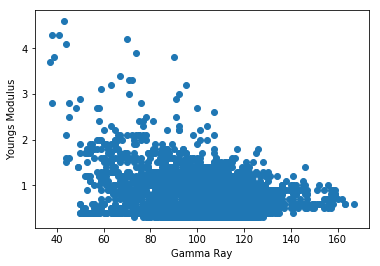

(-0.29125160785191267, 3.6152672659791472e-66)


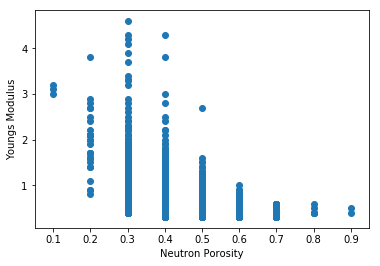

(-0.61986145484703037, 0.0)


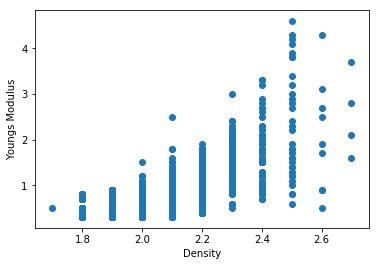

(0.76557949985759133, 0.0)


In [23]:
plt.scatter(frames['XCAL_round'],frames['E_round'])
plt.xlabel('Caliper')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XCAL_round'],frames['E_round']))

plt.scatter(frames['XGR_round'],frames['E_round'])
plt.xlabel('Gamma Ray')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XGR_round'],frames['E_round']))

plt.scatter(frames['XNPHIS_round'],frames['E_round'])
plt.xlabel('Neutron Porosity')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XNPHIS_round'],frames['E_round']))

plt.scatter(frames['XRHOB_round'],frames['E_round'])
plt.xlabel('Density')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XRHOB_round'],frames['E_round']))

In [76]:
from sklearn import svm, grid_search

def svc_param_selection(X, y, nfolds):
    Cs = [1, 10, 100, 1000, 10000]
    gammas = [0.1, 1, 10, 100]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [38]:
svc_param_selection(X_train,y_train,3)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.01, 'gamma': 1}

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


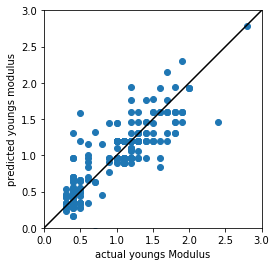

Root Mean Squared Error: 0.33502547539182403


In [39]:
svr = SVR(kernel='poly',C=0.01,gamma = 1)
svr.fit(X_train,y_train)
pred_SVR = svr.predict(X_test)

plt.scatter(y_test, pred_SVR)
plt.xlabel('actual youngs Modulus')
plt.ylabel('predicted youngs modulus')
plt.xlim(0,3)
plt.ylim(0,3)
plt.plot([0,1,2,3],[0,1,2,3], color = 'black')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, pred_SVR))
print("Root Mean Squared Error: {}".format(rmse))

In [36]:
frames['v_round'] = round(frames['v'],1)
frames['XNPHIS_round'] = round(frames['XNPHIS'],1)
frames['E_round'] = round(frames['E'],1)
frames['XGR_round'] = round(frames['XGR'],0)
frames['XCAL_round'] = round(frames['XCAL'],0)
frames['XRHOB_round'] = round(frames['XRHOB'],1)
frames.head()

,DEPTH,E,E_round,GR,R,RHOZ,TVD,TVDSS,XCAL,XCAL_round,...,XNPHIS,XNPHIS_round,XRESD,XRESM,XRESS,XRHOB,XRHOB_round,XSP,v,v_round
0,1700.0,0.408895,0.4,43.9151,2.997424,2.1088,1684.2483,-1600.2483,12.5594,13.0,...,0.3630,0.4,0.8592,0.8805,0.9834,2.1088,2.1,-12.2528,0.437379,0.4
1,1700.5,0.401812,0.4,41.5291,2.989353,2.1041,1684.7405,-1600.7405,12.5668,13.0,...,0.3776,0.4,0.8545,0.8742,0.9790,2.1041,2.1,-12.5943,0.436998,0.4
2,1701.0,0.392431,0.4,41.5637,2.979617,2.1093,1685.2327,-1601.2327,12.4774,12.0,...,0.3962,0.4,0.8594,0.8797,0.9941,2.1093,2.1,-12.7948,0.436533,0.4
3,1701.5,0.390202,0.4,42.8967,2.951776,2.1189,1685.7249,-1601.7249,12.3973,12.0,...,0.3921,0.4,0.8643,0.8843,1.0022,2.1189,2.1,-12.5386,0.435174,0.4
4,1702.0,0.390458,0.4,43.1842,2.900260,2.1209,1686.2170,-1602.2170,12.4272,12.0,...,0.3696,0.4,0.8642,0.8841,1.0028,2.1209,2.1,-12.4572,0.432537,0.4


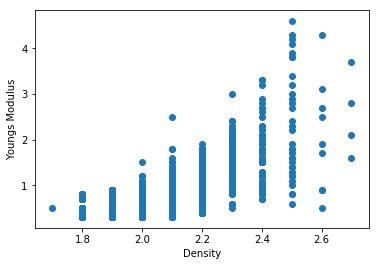

(0.76557949985759133, 0.0)


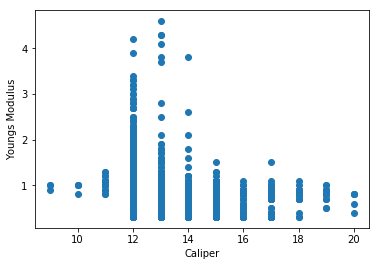

(-0.42072405730861639, 4.0436155344129977e-143)


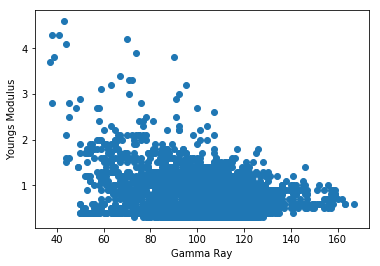

(-0.29125160785191267, 3.6152672659791472e-66)


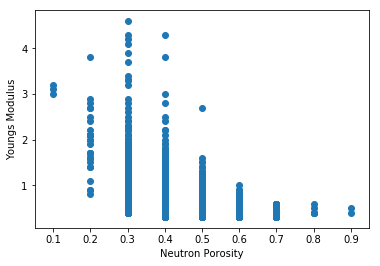

(-0.61986145484703037, 0.0)


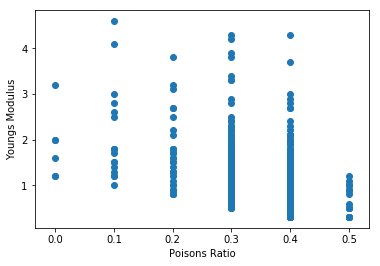

(-0.55985822133044005, 2.3933183826080281e-274)


In [37]:
plt.scatter(frames['XRHOB_round'],frames['E_round'])
plt.xlabel('Density')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XRHOB_round'],frames['E_round']))


plt.scatter(frames['XCAL_round'],frames['E_round'])
plt.xlabel('Caliper')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XCAL_round'],frames['E_round']))

plt.scatter(frames['XGR_round'],frames['E_round'])
plt.xlabel('Gamma Ray')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XGR_round'],frames['E_round']))

plt.scatter(frames['XNPHIS_round'],frames['E_round'])
plt.xlabel('Neutron Porosity')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['XNPHIS_round'],frames['E_round']))

plt.scatter(frames['v_round'],frames['E_round'])
plt.xlabel('Poisons Ratio')
plt.ylabel('Youngs Modulus')
plt.show()
print(scipy.stats.pearsonr(frames['v_round'],frames['E_round']))


In [38]:
X = frames[['XRHOB_round','XNPHIS_round','XCAL_round']]
y = frames['E_round']
y = y.values.reshape(-1,1)

X = X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
X = df_3[['XRHOB_round','XNPHIS_round','XCAL_round']]
y = df_3['E_round']
y = y.values.reshape(-1,1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

# Plot the results
plt.figure()
s = 50
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


IndexError: index 1 is out of bounds for axis 1 with size 1

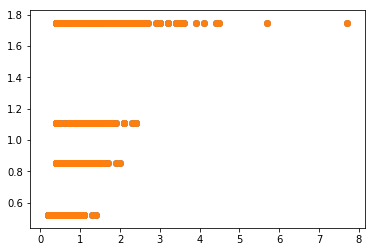

In [28]:
plt.scatter(y,y_1)
plt.show()

In [30]:
y_1

array([ 0.85444596,  0.85444596,  1.111875  , ...,  1.111875  ,
        1.111875  ,  1.111875  ])

In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor_3 = DecisionTreeRegressor(max_depth=3)
regressor_3.fit(frames[['XRHOB', 'XNPHIS']], frames['E'])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor_10 = DecisionTreeRegressor(max_depth=5)
regressor_10.fit(frames[['XRHOB', 'XNPHIS']], frames['E'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
nx = 30
ny = 30
# creating a grid of points
x_RHOB = np.linspace(min(frames.XRHOB_round), max(frames.XRHOB_round), nx) # min temperature -5, max 40
y_NPHIS = np.linspace(min(frames.XNPHIS_round), max(frames.XNPHIS_round), ny) # min humidity 20, max 80
xx_RHOB, yy_NPHIS = np.meshgrid(x_RHOB, y_NPHIS)
# evaluating the regressor on all the points
z_bikes = regressor.predict(np.array([xx_RHOB.flatten(), yy_NPHIS.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))

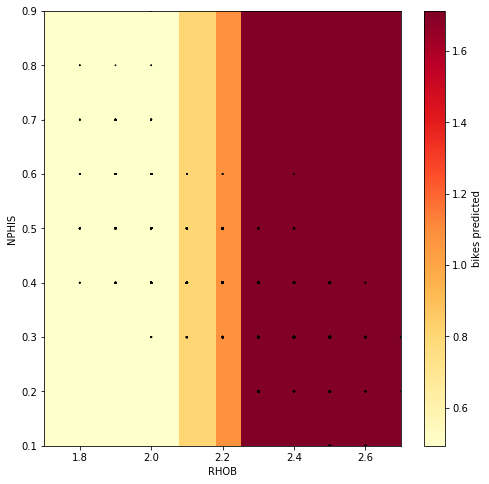

In [72]:
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_RHOB, y_NPHIS, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(frames['XRHOB_round'], frames['XNPHIS_round'], s=frames['E_round'], c='K')
# setting the limit for each axis
plt.xlim(np.min(x_RHOB), np.max(x_RHOB))
plt.ylim(np.min(y_NPHIS), np.max(y_NPHIS))
plt.xlabel('RHOB')
plt.ylabel('NPHIS')
plt.show()

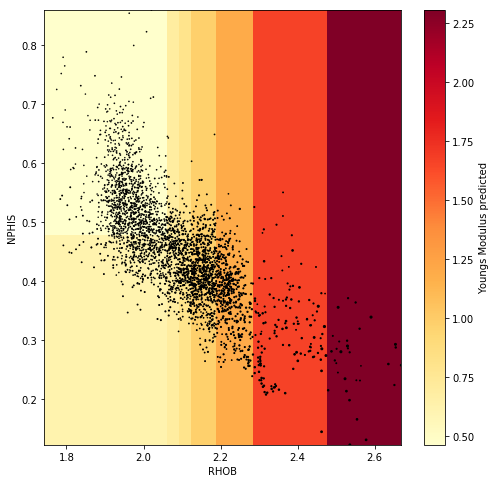

In [84]:
nx = 30
ny = 30
# creating a grid of points
x_RHOB = np.linspace(min(frames.XRHOB), max(frames.XRHOB), nx)
y_NPHIS = np.linspace(min(frames.XNPHIS), max(frames.XNPHIS), ny)
xx_RHOB, yy_NPHIS = np.meshgrid(x_RHOB, y_NPHIS)
# evaluating the regressor on all the points
z_bikes = regressor.predict(np.array([xx_RHOB.flatten(), yy_NPHIS.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))

from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_RHOB, y_NPHIS, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='Youngs Modulus predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(frames['XRHOB'], frames['XNPHIS'], s=frames['E'], c='K')
# setting the limit for each axis
plt.xlim(np.min(x_RHOB), np.max(x_RHOB))
plt.ylim(np.min(y_NPHIS), np.max(y_NPHIS))
plt.xlabel('RHOB')
plt.ylabel('NPHIS')
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(frames['E'], regressor.predict(frames[['XRHOB', 'XNPHIS']]))

0.17264517762358275

In [86]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(frames['E_round'], regressor.predict(frames[['XRHOB_round', 'XNPHIS_round']]))

0.19356033337024448

In [87]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, frames[['XRHOB_round', 'XNPHIS_round']],frames['E_round'], scoring='mean_absolute_error', cv=10)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Sc

In [88]:
print(scores)

[ 0.25647274  0.17073675  0.25014902  0.16035169  0.13170369  0.1327449
  0.19111497  0.21732294  0.19410898  0.33079858]


In [89]:
scores.mean()

0.20355042587407182

In [105]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor_10, frames[['XRHOB_round', 'XNPHIS_round']],frames['E_round'], scoring='mean_absolute_error', cv=10)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/s

In [106]:
scores.mean()

0.20049733047278068

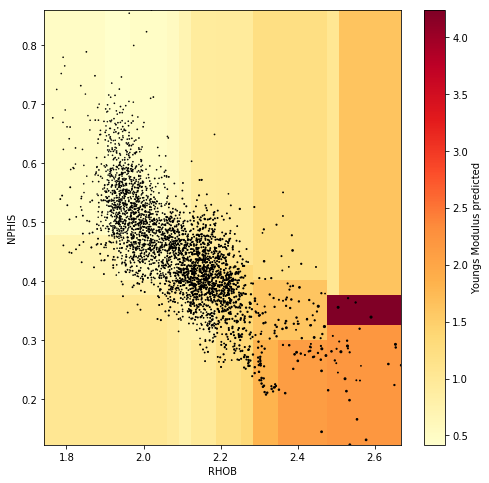

In [107]:
nx = 30
ny = 30
# creating a grid of points
x_RHOB = np.linspace(min(frames.XRHOB), max(frames.XRHOB), nx)
y_NPHIS = np.linspace(min(frames.XNPHIS), max(frames.XNPHIS), ny)
xx_RHOB, yy_NPHIS = np.meshgrid(x_RHOB, y_NPHIS)
# evaluating the regressor on all the points
z_bikes = regressor_10.predict(np.array([xx_RHOB.flatten(), yy_NPHIS.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))

from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_RHOB, y_NPHIS, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='Youngs Modulus predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(frames['XRHOB'], frames['XNPHIS'], s=frames['E'], c='K')
# setting the limit for each axis
plt.xlim(np.min(x_RHOB), np.max(x_RHOB))
plt.ylim(np.min(y_NPHIS), np.max(y_NPHIS))
plt.xlabel('RHOB')
plt.ylabel('NPHIS')
plt.show()